## Below is the code that evaluates GPT3.5 Turbo's performance on solving math questions by categories

In [1]:
import json
import openai
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

In [3]:
# Enter API Key
client = openai.OpenAI(
    api_key=""  # Use API key
)

# data_path = "test.json"

data_path = "challenge_test.json"
data = load_data(data_path)

results = []

In [4]:
for item in data:
    prompt = f"Solve this math problem: {item['Problem']} " \
             f"First, try to solve the problem without looking at the options and correct answer and provide your initial answer and explanation. " \
             f"Now, respond with a JSON object that includes " \
             f"your answer, explanation, and your self-evaluation of whether your answer and explanation match the correct answer '{item['correct']}' from available options '{item['options']}' "\
             f"and the rationale: {item['Rationale']}. " \
             f"Format your response strictly as follows: '{{\"My Answer\": \"<answer>\", \"Explanation\": \"<explanation>\", " \
             f"\"Answer Correct\": \"<yes/no>\", \"Explanation Correct\": \"<yes/no>\"}}'."

    response = chat_gpt(prompt)
    
#     print(response)

    try:
        response_data = json.loads(response)
        answer = response_data["My Answer"]
        explanation = response_data["Explanation"]
        answer_correct = response_data["Answer Correct"].lower() == "yes"
        explanation_correct = response_data["Explanation Correct"].lower() == "yes"
    except Exception as e:
        answer, explanation = 'Error parsing', 'Error parsing'
        answer_correct, explanation_correct = False, False

    results.append({
        "Problem": item['Problem'],
        "Options": item['options'],
        "GPT's Answer": answer,
        "Correct Answer": item['correct'],
        "GPT's Explanation": explanation,
        "Category": item['category'],
        "Original Rationale": item['Rationale'],
        "Is Correct": answer_correct,
        "Explanation Correct": explanation_correct
    })

In [5]:
# print(results)

In [12]:
df = pd.DataFrame(results)

overall_accuracy = accuracy_score(df['Is Correct'], [True] * len(df))
reasoning_accuracy = accuracy_score(df['Explanation Correct'], [True] * len(df))

print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Explanation Accuracy: {reasoning_accuracy:.4f}")

Overall Accuracy: 0.9123
Overall Explanation Accuracy: 0.9205


/var/folders/vw/hqk7tgxd4k5g_shb6m9wnwj80000gn/T/ipykernel_30560/325969578.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_data = df.groupby('Category').apply(lambda x: accuracy_score(x[column], [True] * len(x)))
/var/folders/vw/hqk7tgxd4k5g_shb6m9wnwj80000gn/T/ipykernel_30560/325969578.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_data = df.groupby('Category').apply(lambda x: ac

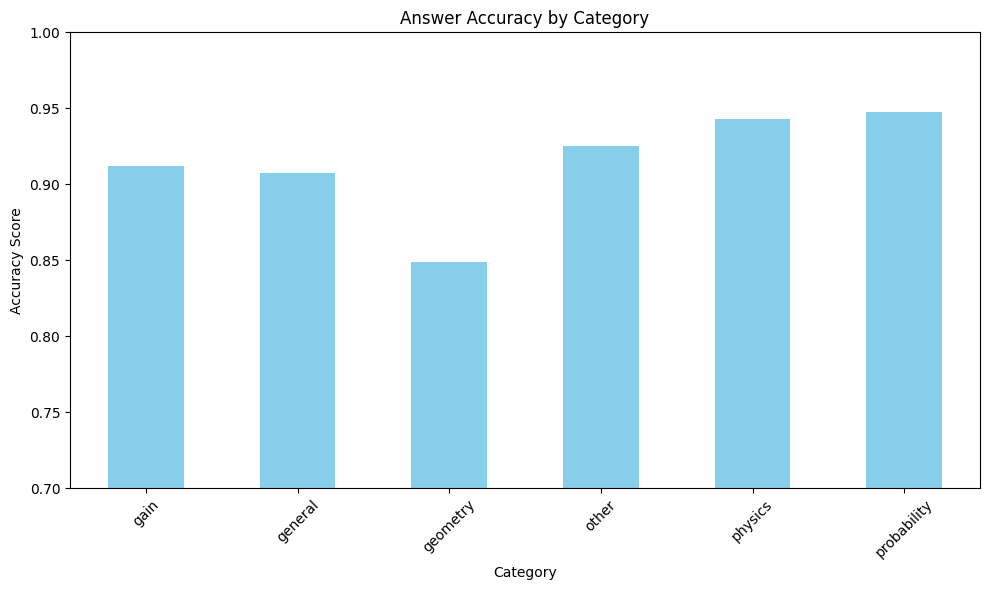

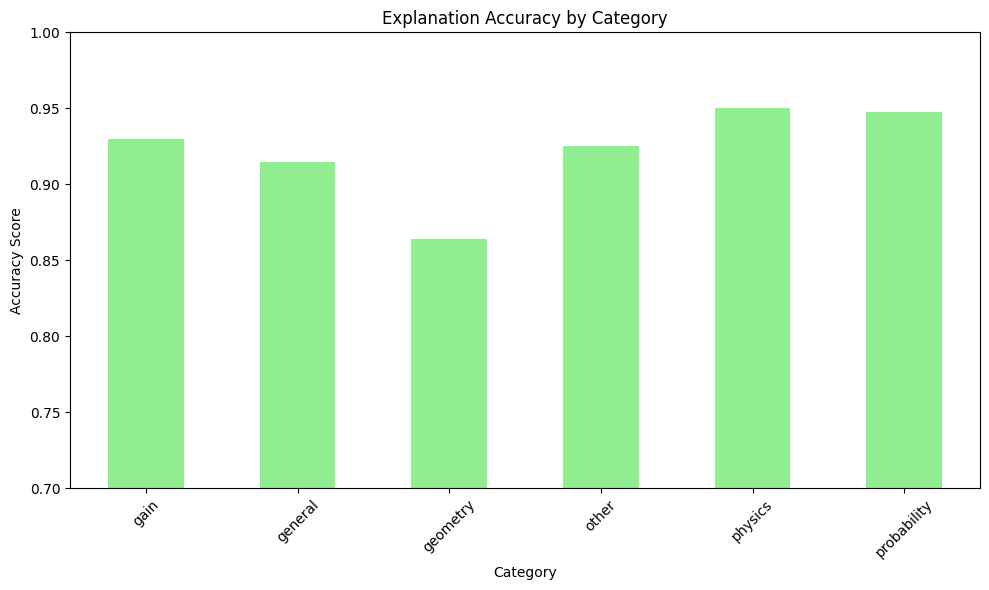

In [14]:
def calculate_accuracy(df, column):
    accuracy_data = df.groupby('Category').apply(lambda x: accuracy_score(x[column], [True] * len(x)))
    return accuracy_data

answer_accuracy = calculate_accuracy(df, 'Is Correct')
explanation_accuracy = calculate_accuracy(df, 'Explanation Correct')

# Answer Accuracy by Category
plt.figure(figsize=(10, 6))
answer_accuracy.plot(kind='bar', color='skyblue')
plt.title('Answer Accuracy by Category')
plt.xlabel('Category')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Explanation Accuracy by Category
plt.figure(figsize=(10, 6))
explanation_accuracy.plot(kind='bar', color='lightgreen')
plt.title('Explanation Accuracy by Category')
plt.xlabel('Category')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()